## Part 1: Text Preprocessing and Exploration

Let's import the required libraries and load our dataset:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# For dataset loading
from sklearn.datasets import fetch_20newsgroups

# Set random seed for reproducibility
np.random.seed(42)

# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'text': newsgroups.data,
    'category': [newsgroups.target_names[target] for target in newsgroups.target]
})

# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/faheemunnisasyeda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package ave

Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


### Step 1: Basic Data Exploration
Let's examine the length characteristics of our documents:

Character count statistics:
count     2236.000000
mean      1918.330948
std       3850.168516
min        125.000000
25%        744.000000
50%       1157.500000
75%       1859.000000
max      60713.000000
Name: char_count, dtype: float64

Word count statistics:
count    2236.000000
mean      291.903846
std       584.403700
min        15.000000
25%       104.000000
50%       173.500000
75%       290.000000
max      9168.000000
Name: word_count, dtype: float64


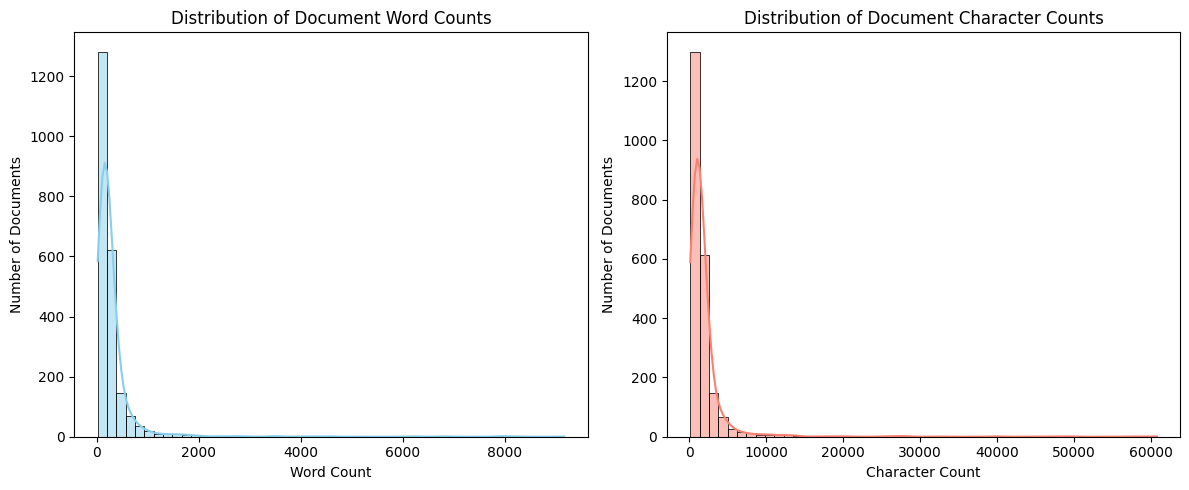

In [2]:
# Add a column for document length (number of characters)
df['char_count'] = df['text'].apply(len)

# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Display basic statistics
print("Character count statistics:")
print(df['char_count'].describe())

print("\nWord count statistics:")
print(df['word_count'].describe())

# Visualize document lengths
plt.figure(figsize=(12,5))

# Histogram for word counts
plt.subplot(1,2,1)
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Document Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')

# Histogram for character counts
plt.subplot(1,2,2)
sns.histplot(df['char_count'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Document Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()


### Step 2: Text Cleaning and Preprocessing Function
Let's create a comprehensive text preprocessing function that incorporates all the techniques we've learned:

In [3]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Load stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text, do_stemming=False, do_lemmatization=True):
    """
    Preprocess input text by cleaning, tokenizing, removing stopwords,
    and optionally applying stemming or lemmatization.
    
    Parameters:
    - text (str): Raw text input
    - do_stemming (bool): Whether to apply stemming
    - do_lemmatization (bool): Whether to apply lemmatization
    
    Returns:
    - cleaned_text (str): Preprocessed text
    """
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming or lemmatization
    if do_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    elif do_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


### Step 3: Apply Preprocessing and Analyze Results
Now let's apply our preprocessing function to the dataset and examine the results:

Original (comp.graphics):
From: nfotis@ntua.gr (Nick C. Fotis)
Subject: Re: more on radiosity
Organization: National Technical University of Athens
Lines: 34

amann@iam.unibe.ch (Stephan Amann) writes:

>In article 66319@yuma....

Cleaned:
nick c fotis subject radiosity organization national technical university athens line stephan amann writes article xia zhao writes article write let serious im working radiosity package written c woul...

--------------------------------------------------------------------------------
Original (talk.politics.misc):
From: cdm@pmafire.inel.gov (Dale Cook)
Subject: Re: Good Neighbor Political Hypocrisy Test
Organization: WINCO
Lines: 25

In article <1993Apr15.193603.14228@magnus.acs.ohio-state.edu> rscharfy@magnus....

Cleaned:
dale cook subject good neighbor political hypocrisy test organization winco line article ryan c scharfy writes article steve thomas wri te try justify war drug dare friend mine smoke pot every day las...

------------------------

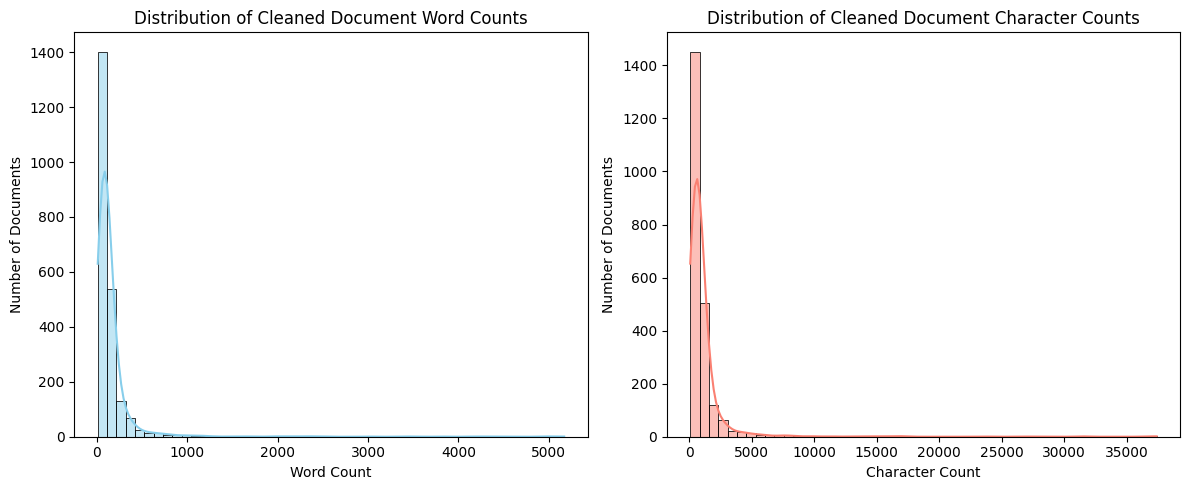

In [4]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x))

# Preview the original vs cleaned text
for i in range(3):
    print(f"Original ({df['category'][i]}):\n{df['text'][i][:200]}...\n")
    print(f"Cleaned:\n{df['cleaned_text'][i][:200]}...\n")
    print("-"*80)

# Basic analysis: document length after cleaning
df['cleaned_word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['cleaned_char_count'] = df['cleaned_text'].apply(len)

print("Cleaned word count statistics:")
print(df['cleaned_word_count'].describe())

print("\nCleaned character count statistics:")
print(df['cleaned_char_count'].describe())

# Visualize cleaned document lengths
plt.figure(figsize=(12,5))

# Histogram for cleaned word counts
plt.subplot(1,2,1)
sns.histplot(df['cleaned_word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Cleaned Document Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')

# Histogram for cleaned character counts
plt.subplot(1,2,2)
sns.histplot(df['cleaned_char_count'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Cleaned Document Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()

### Step 4: Token Frequency Analysis
Let's analyze the most common words in each category after preprocessing:

In [5]:
from collections import Counter

# Function to get top N words for a given category
def get_top_words(df, category, n=10):
    # Combine all cleaned text in the category
    cat_text = ' '.join(df[df['category'] == category]['cleaned_text'])
    # Split into words
    words = cat_text.split()
    # Count frequencies
    word_freq = Counter(words)
    # Return top N
    return word_freq.most_common(n)

# Analyze top words for each category
for category in df['category'].unique():
    top_words = get_top_words(df, category, n=10)
    print(f"Top 10 words in category '{category}':")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("-"*50)

Top 10 words in category 'comp.graphics':
line: 774
image: 758
subject: 627
organization: 581
file: 554
graphic: 460
university: 360
program: 329
would: 295
x: 279
--------------------------------------------------
Top 10 words in category 'talk.politics.misc':
would: 692
people: 684
writes: 611
q: 575
article: 573
line: 525
one: 515
dont: 508
organization: 506
subject: 500
--------------------------------------------------
Top 10 words in category 'sci.space':
space: 1200
line: 646
subject: 635
organization: 631
would: 553
writes: 452
one: 413
nasa: 407
article: 402
launch: 377
--------------------------------------------------
Top 10 words in category 'rec.autos':
car: 1223
line: 642
subject: 625
organization: 589
writes: 484
article: 453
would: 430
one: 362
like: 327
dont: 322
--------------------------------------------------


### Step 5: N-gram Analysis
Let's go beyond single words and look at common bigrams and trigrams:

/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_78008/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_78008/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/2x/x881t5116gvcv99x57d0tz240000gn/T/ipykernel_78008/2708362097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")
/var/folders/

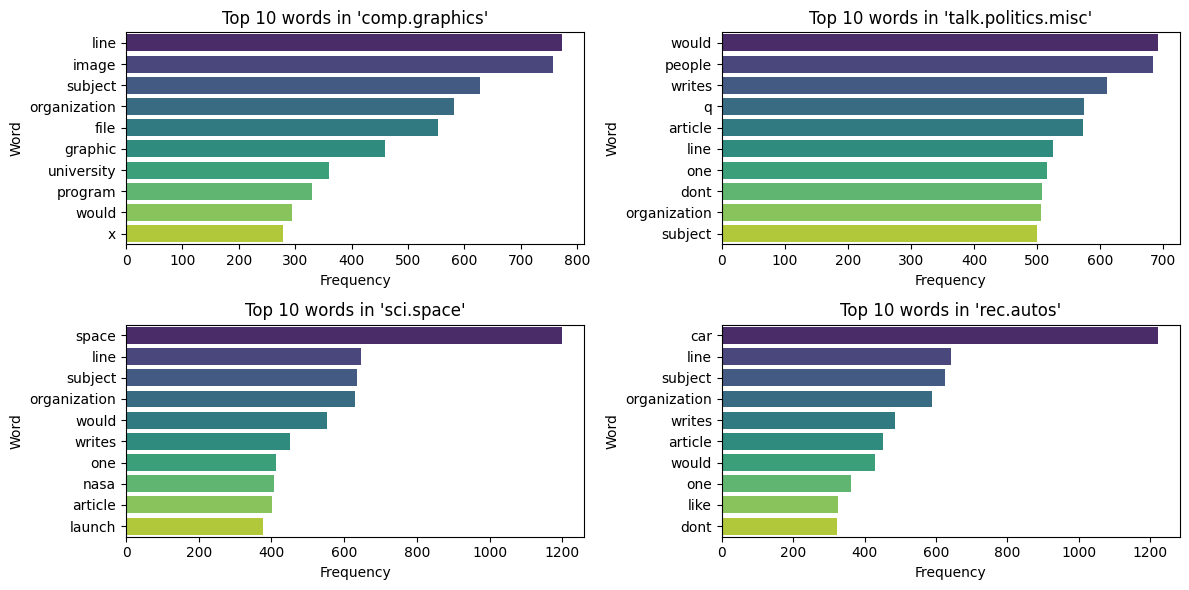

In [6]:
plt.figure(figsize=(12,6))

for i, category in enumerate(df['category'].unique()):
    plt.subplot(2, 2, i+1)
    top_words = get_top_words(df, category, n=10)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top 10 words in '{category}'")
    plt.xlabel("Frequency")
    plt.ylabel("Word")

plt.tight_layout()
plt.show()

## Part 2: Time Series Analysis and Modeling

### Step 1: Data Loading and Initial Exploration
First, let's load the S&P 500 historical data and perform initial exploration.

[*********************100%***********************]  1 of 1 completed


S&P 500 Dataset:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2013-01-02  1462.420044  1462.430054  1426.189941  1426.189941  4202600000
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   2518 non-null   float64
 1   (High, ^GSPC)    2518 non-null   float64
 2   (Low, ^GSPC)     2518 non-null   float64
 3   (O

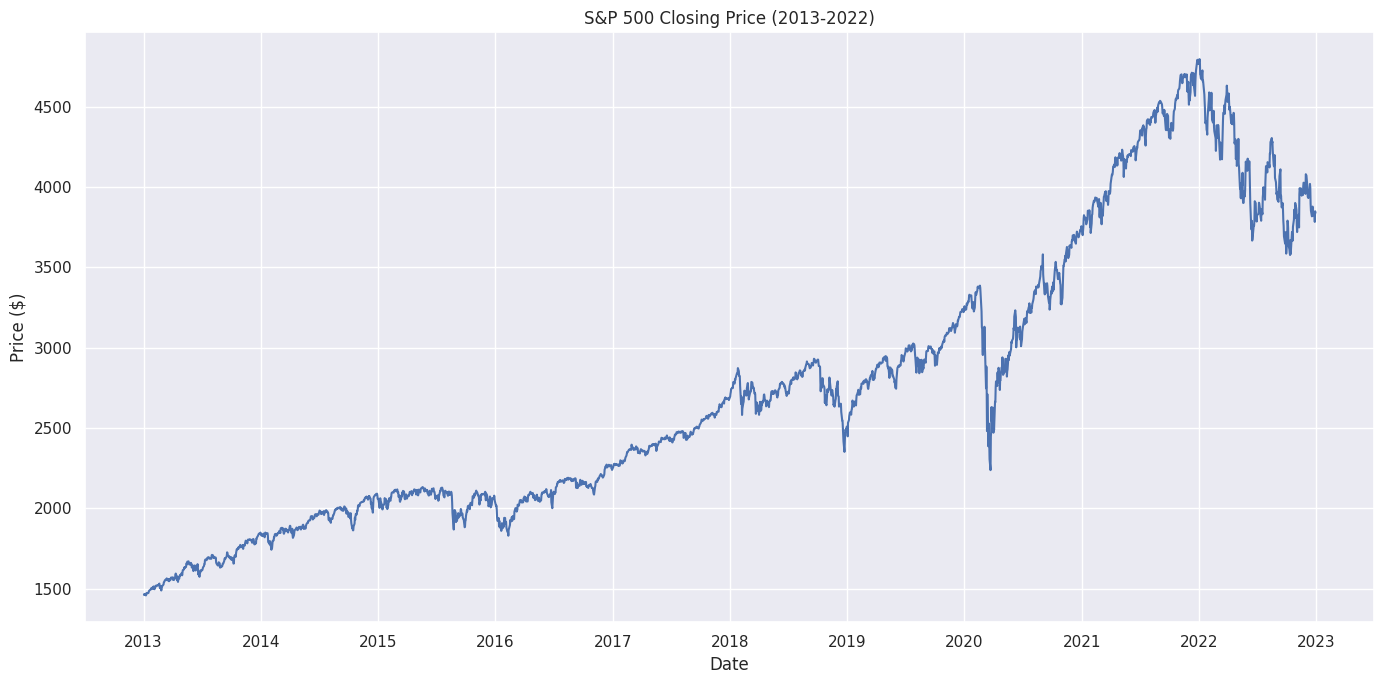


Selected time series shape: (2518, 1)


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_theme()

# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())

# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())

# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

### Step 2: Time Series Characteristics and Visualization
Let's analyze the characteristics of the time series through various visualizations.

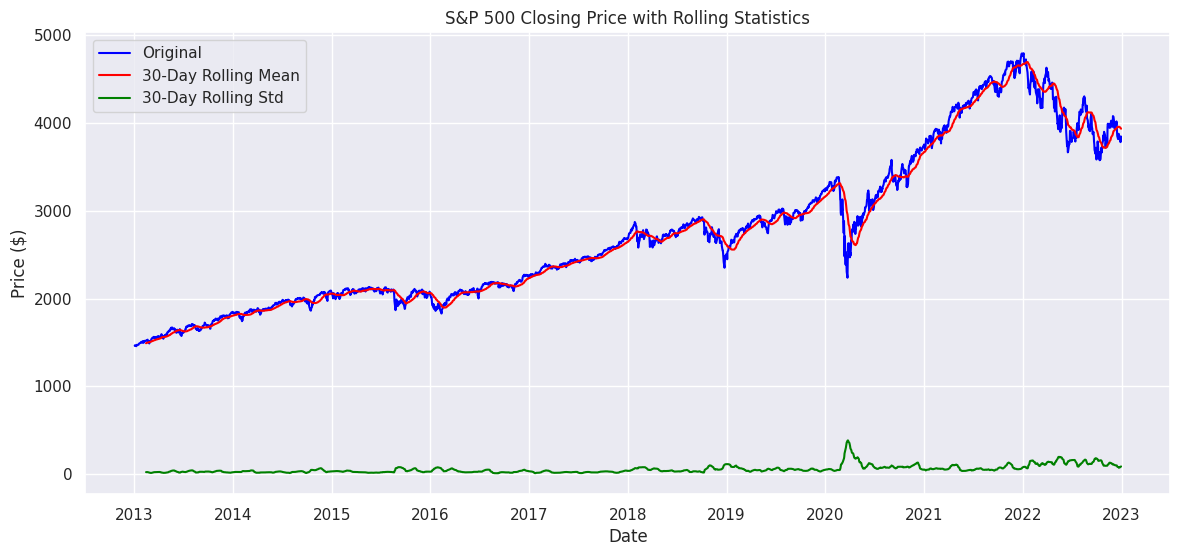

In [5]:
# Rolling window size (e.g., 30 trading days ~ 1.5 months)
window_size = 30

rolling_mean = ts_data.rolling(window=window_size).mean()
rolling_std = ts_data.rolling(window=window_size).std()

plt.figure(figsize=(14,6))
plt.plot(ts_data, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label=f'{window_size}-Day Rolling Mean')
plt.plot(rolling_std, color='green', label=f'{window_size}-Day Rolling Std')
plt.title('S&P 500 Closing Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


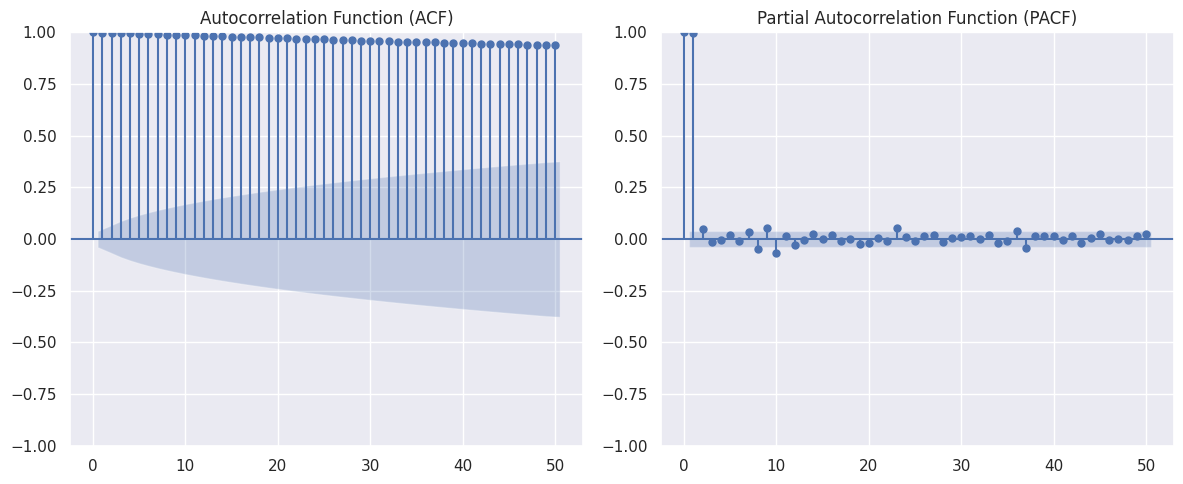

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(ts_data.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1,2,2)
plot_pacf(ts_data.dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

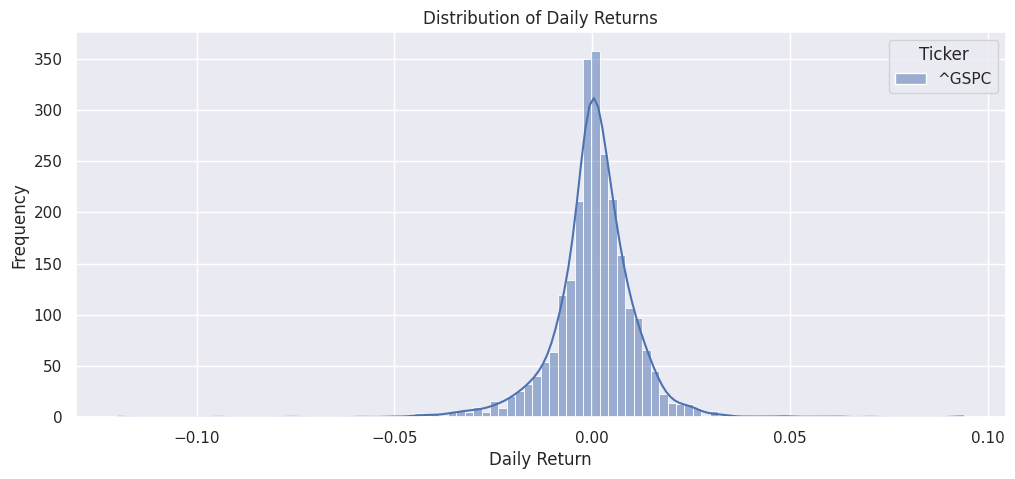

In [8]:
# Calculate daily returns
returns = ts_data.pct_change().dropna()

plt.figure(figsize=(12,5))
sns.histplot(returns, bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Step 3: Stationarity Testing and Transformation
Now, let's test for stationarity using the Dickey-Fuller test and apply transformations to make the data stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
    adf_result = adfuller(ts.dropna())
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    if adf_result[1] < 0.05:
        print("Conclusion: The time series is stationary.")
    else:
        print("Conclusion: The time series is non-stationary.")

# Test original series
print("Testing Original Series:")
test_stationarity(ts_data)

Testing Original Series:
ADF Statistic: -1.0312090768619326
p-value: 0.7417120357643833
Critical Values:
   1%: -3.4329610922579095
   5%: -2.8626935681060375
   10%: -2.567384088736619
Conclusion: The time series is non-stationary.


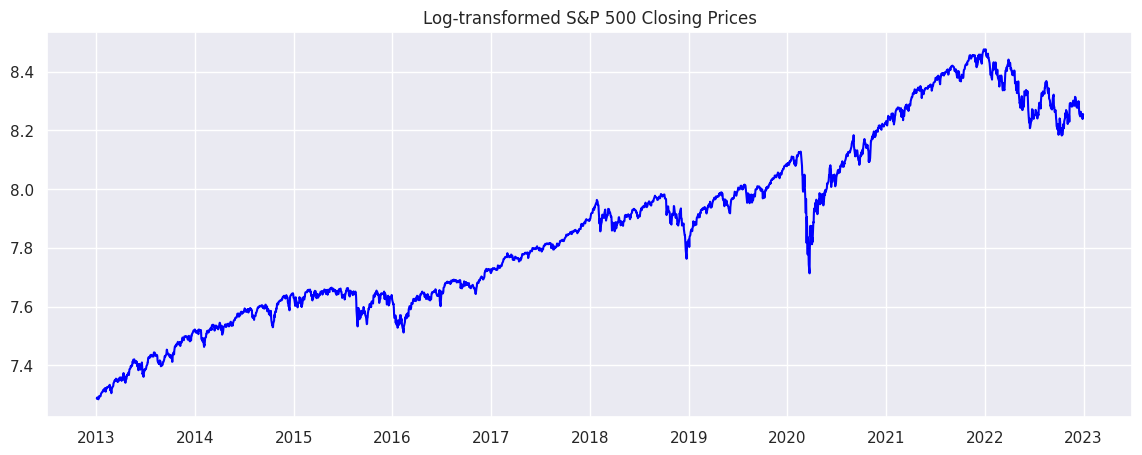

In [10]:
# log transformation
ts_log = np.log(ts_data)
plt.figure(figsize=(14,5))
plt.plot(ts_log, color='blue')
plt.title('Log-transformed S&P 500 Closing Prices')
plt.show()

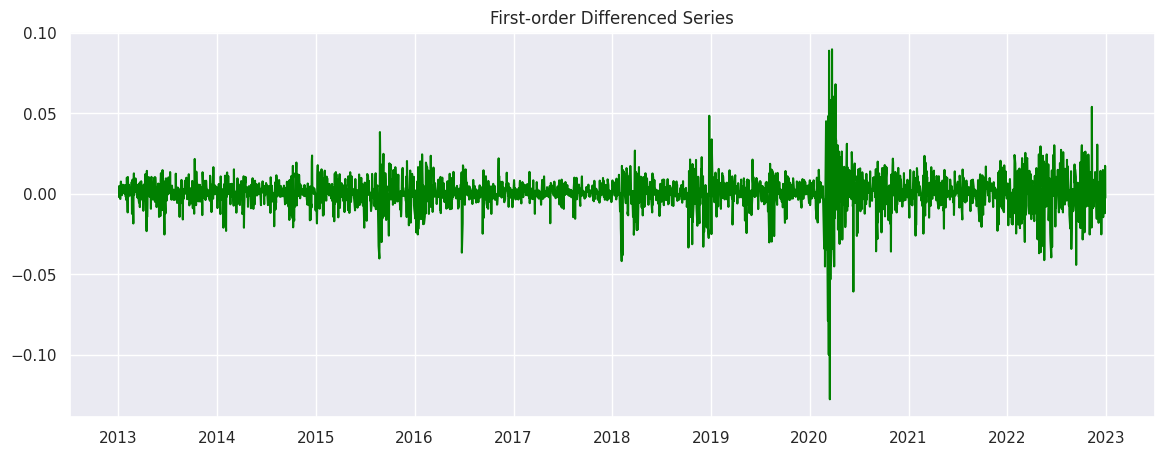

Testing Differenced Series:
ADF Statistic: -15.837387406791676
p-value: 9.782658846188109e-29
Critical Values:
   1%: -3.4329610922579095
   5%: -2.8626935681060375
   10%: -2.567384088736619
Conclusion: The time series is stationary.


In [11]:
# First-order Differencing – removes trend:
ts_diff = ts_log.diff().dropna()

plt.figure(figsize=(14,5))
plt.plot(ts_diff, color='green')
plt.title('First-order Differenced Series')
plt.show()

# Test stationarity of differenced series
print("Testing Differenced Series:")
test_stationarity(ts_diff)

### Step 4: Time Series Decomposition
Let's decompose our time series into trend, seasonal, and residual components.

In [12]:
decomposition = seasonal_decompose(ts_data, model='multiplicative', period=252)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

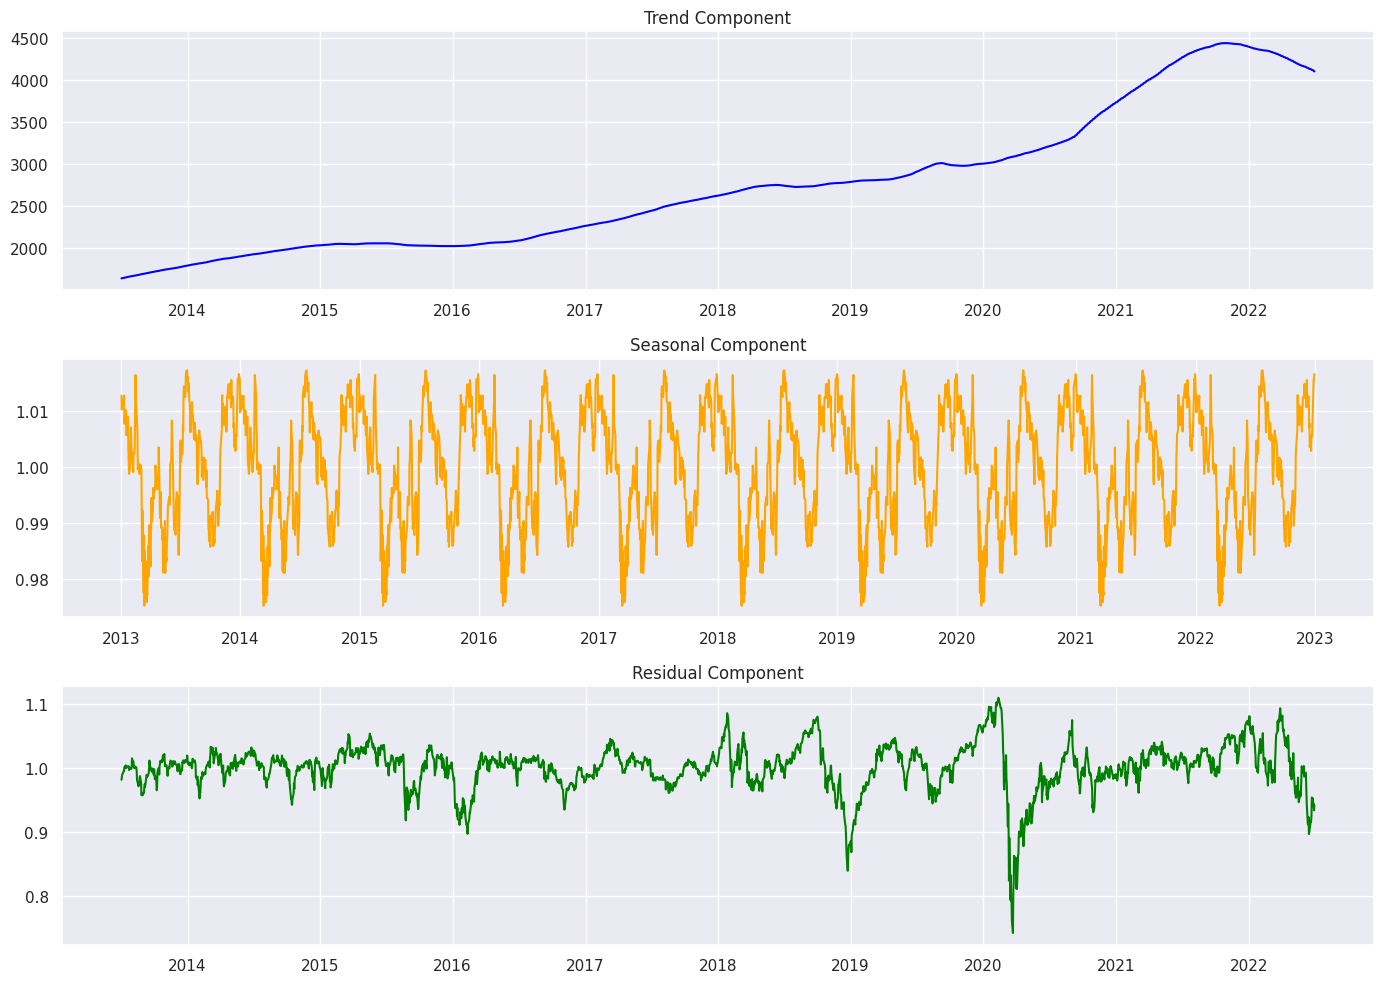

In [13]:
plt.figure(figsize=(14,10))

# Trend
plt.subplot(3,1,1)
plt.plot(trend, color='blue')
plt.title('Trend Component')
plt.grid(True)

# Seasonality
plt.subplot(3,1,2)
plt.plot(seasonal, color='orange')
plt.title('Seasonal Component')
plt.grid(True)

# Residuals
plt.subplot(3,1,3)
plt.plot(residual, color='green')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()


### Step 5: Autocorrelation Analysis
Now, let's analyze the autocorrelation structure of our stationary series.

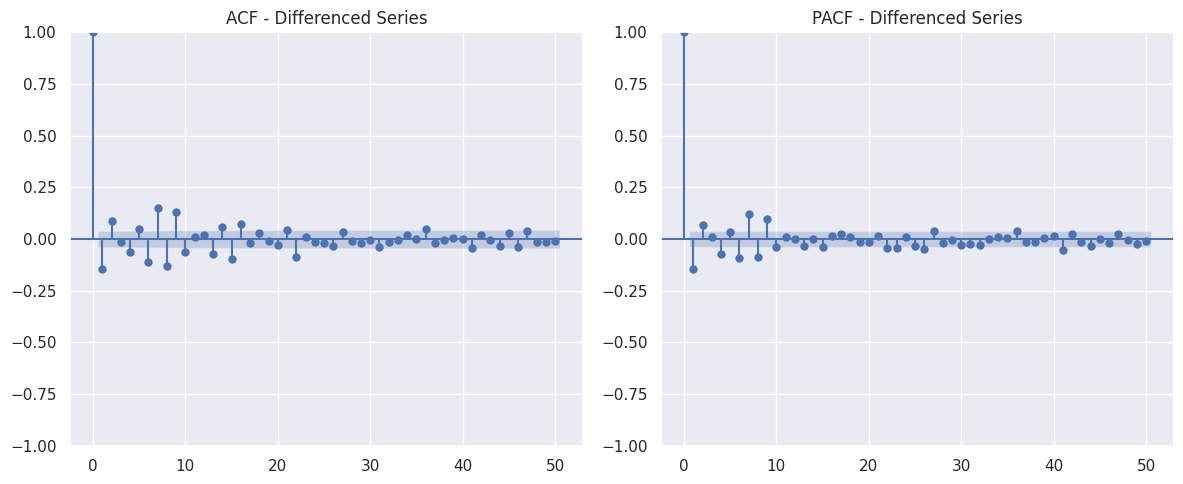

In [14]:
plt.figure(figsize=(12,5))

# Autocorrelation Function (ACF)
plt.subplot(1,2,1)
plot_acf(ts_diff, lags=50, ax=plt.gca())
plt.title('ACF - Differenced Series')

# Partial Autocorrelation Function (PACF)
plt.subplot(1,2,2)
plot_pacf(ts_diff, lags=50, ax=plt.gca())
plt.title('PACF - Differenced Series')

plt.tight_layout()
plt.show()

### Step 6: Time Series Modeling
Finally, let's build and evaluate time series models based on our analysis.

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 2518
Model:                 ARIMA(1, 1, 0)   Log Likelihood                7778.885
Date:                Mon, 27 Oct 2025   AIC                         -15553.770
Time:                        22:18:08   BIC                         -15542.108
Sample:                             0   HQIC                        -15549.537
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1444      0.007    -19.714      0.000      -0.159      -0.130
sigma2         0.0001   1.26e-06     95.795      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.18   Jarque-

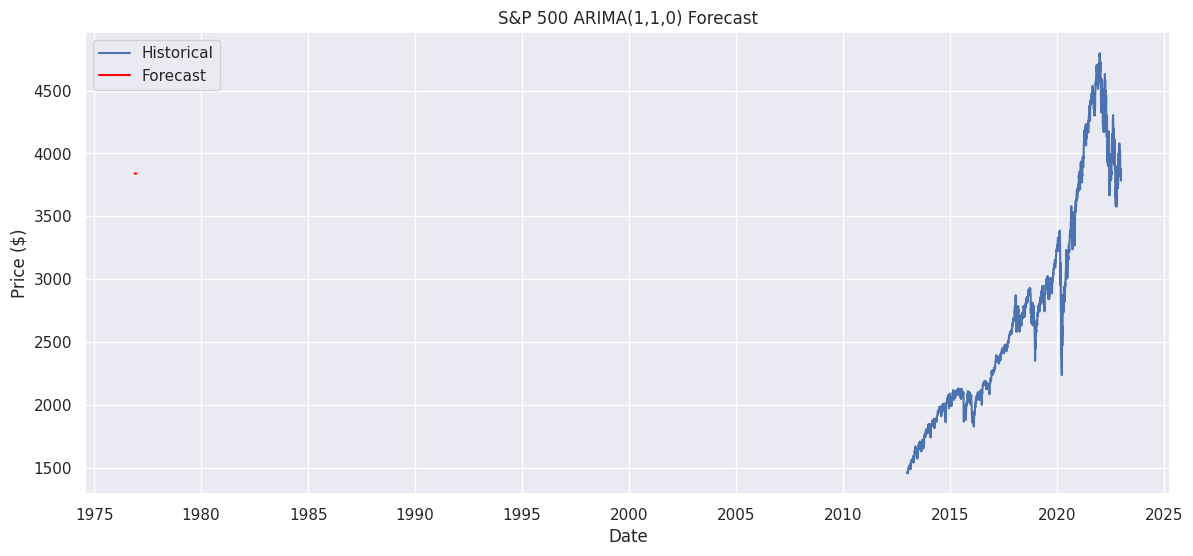

In [15]:
# Fit ARIMA(1,1,0) model on log-transformed data
model = ARIMA(ts_log, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 30 trading days
forecast_log = model_fit.forecast(steps=30)
forecast = np.exp(forecast_log)  # revert log transform

# Plot
plt.figure(figsize=(14,6))
plt.plot(ts_data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('S&P 500 ARIMA(1,1,0) Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

Metric and 	Interpretation
- AR(1) coefficient = -0.1444 (p < 0.001).The negative and significant AR term suggests slight mean reversion  a small tendency for returns to move opposite to the previous period’s change.
- σ² = 0.0001	Indicates low residual variance — the model fits reasonably well.
- AIC = -15553.77	Very low (good). This can be used for comparison with other ARIMA configurations (lower = better).
- BIC = -15542.11	Also low — supports model parsimony.

In [16]:
# Fit ARIMA(1,1,1) model
model_111 = ARIMA(ts_data, order=(1,1,1))
model_111_fit = model_111.fit()

# Print summary
print(model_111_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 2518
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12388.323
Date:                Mon, 27 Oct 2025   AIC                          24782.647
Time:                        22:25:14   BIC                          24800.139
Sample:                             0   HQIC                         24788.995
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3846      0.062     -6.198      0.000      -0.506      -0.263
ma.L1          0.2759      0.065      4.221      0.000       0.148       0.404
sigma2      1104.1869     13.063     84.526      0.0

| Metric                   | ARIMA(1,1,0)  | ARIMA(1,1,1) | Preferred                           |
| :----------------------- | :------------ | :----------- | :---------------------------------- |
| **AIC**                  | **-15553.77** | **24782.65** | ✅ **ARIMA(1,1,0)** (lower = better) |
| **BIC**                  | -15542.11     | 24800.14     | ✅ **ARIMA(1,1,0)**                  |
| **Log Likelihood**       | 7778.89       | -12388.32    | ✅ **ARIMA(1,1,0)**                  |
| **Residual Diagnostics** | p(Q)=0.67     | p(Q)=0.82    | Both acceptable                     |


# model Fit
- The ARIMA(1,1,0) model performs significantly better — it has a much lower AIC/BIC and a higher log likelihood.
- Even though ARIMA(1,1,1) is more flexible (includes an MA term), its AIC skyrocketed, which means it overfits or poorly captures the data structure.

# Coefficient Significance

- Both AR and MA terms in ARIMA(1,1,1) are statistically significant (p < 0.001).

- However, significance alone doesn’t mean a better model — model fit statistics and residual behavior matter more.

## Part 3: Neural Networks Implementation and Optimization

### Step 1: Load libraries and prepare the datasets

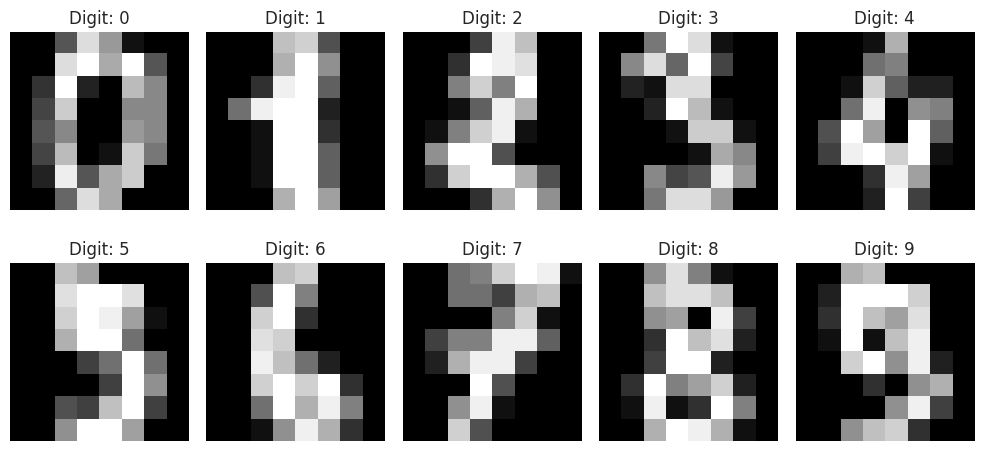

Digits dataset: 1797 samples, 64 features


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target


# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

### Step 2: Preprocess data for neural networks

In [18]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Normalize feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check distribution after scaling
print("\nFeature mean after scaling (should be near 0):", np.mean(X_train_scaled))
print("Feature std after scaling (should be near 1):", np.std(X_train_scaled))

# Convert data to TensorFlow and PyTorch-compatible formats
# (optional, if using both frameworks)

# For TensorFlow
X_train_tf = X_train_scaled
X_test_tf = X_test_scaled
y_train_tf = y_train
y_test_tf = y_test

# For PyTorch
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

print("\nPreprocessing complete — data ready for neural network modeling!")

Training set shape: (1437, 64)
Test set shape: (360, 64)

Feature mean after scaling (should be near 0): 7.416938786639876e-18
Feature std after scaling (should be near 1): 0.9762812094883324

Preprocessing complete — data ready for neural network modeling!


### Step 3: Build a basic MLP for digits classification using TensorFlow/Keras

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.3838 - loss: 1.8549 - val_accuracy: 0.8500 - val_loss: 0.6671
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8965 - loss: 0.5065 - val_accuracy: 0.9444 - val_loss: 0.2641
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9531 - loss: 0.2098 - val_accuracy: 0.9667 - val_loss: 0.1780
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9710 - loss: 0.1192 - val_accuracy: 0.9694 - val_loss: 0.1456
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0753 - val_accuracy: 0.9722 - val_loss: 0.1292
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9947 - loss: 0.0507 - val_accuracy: 0.9722 - val_loss: 0.1198
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9983 - loss: 0.0359 - val_accuracy: 0.9722 - val_loss: 0.1137
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9983 - loss: 0.0264 - val_accuracy: 0.9778 - v

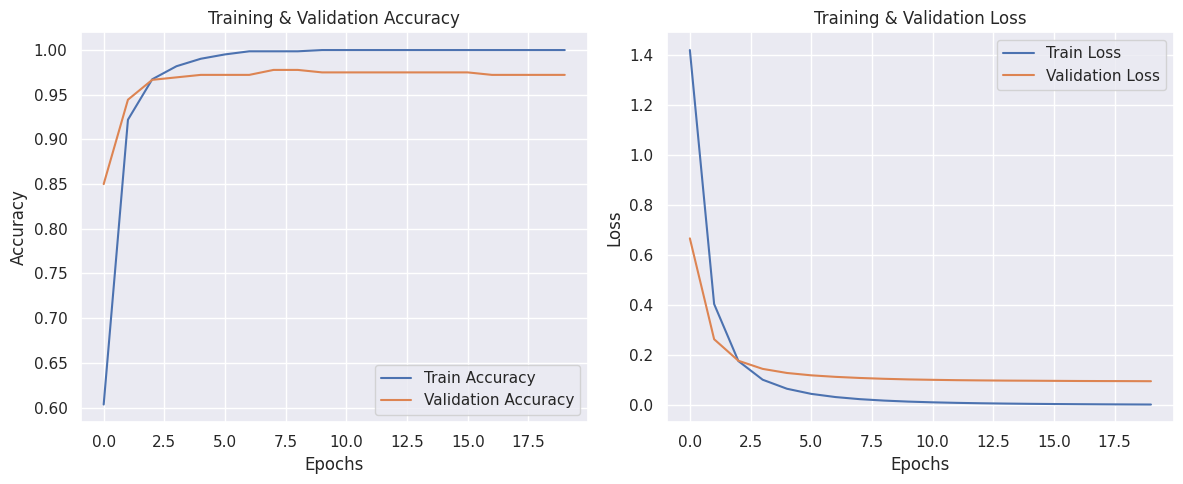

In [19]:
from tensorflow import keras
from keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Input(shape=(64,)),          # Input layer (each sample has 64 features)
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes: digits 0–9)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train_tf, y_train_tf,
    validation_data=(X_test_tf, y_test_tf),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate model performance on test data
test_loss, test_acc = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Step 4: Implement the digits classification model in PyTorch

Epoch [1/20], Loss: 1.8056
Epoch [2/20], Loss: 0.6036
Epoch [3/20], Loss: 0.2222
Epoch [4/20], Loss: 0.1266
Epoch [5/20], Loss: 0.0844
Epoch [6/20], Loss: 0.0591
Epoch [7/20], Loss: 0.0445
Epoch [8/20], Loss: 0.0311
Epoch [9/20], Loss: 0.0243
Epoch [10/20], Loss: 0.0182
Epoch [11/20], Loss: 0.0144
Epoch [12/20], Loss: 0.0114
Epoch [13/20], Loss: 0.0092
Epoch [14/20], Loss: 0.0076
Epoch [15/20], Loss: 0.0064
Epoch [16/20], Loss: 0.0055
Epoch [17/20], Loss: 0.0046
Epoch [18/20], Loss: 0.0040
Epoch [19/20], Loss: 0.0035
Epoch [20/20], Loss: 0.0031

Test Accuracy: 0.9778


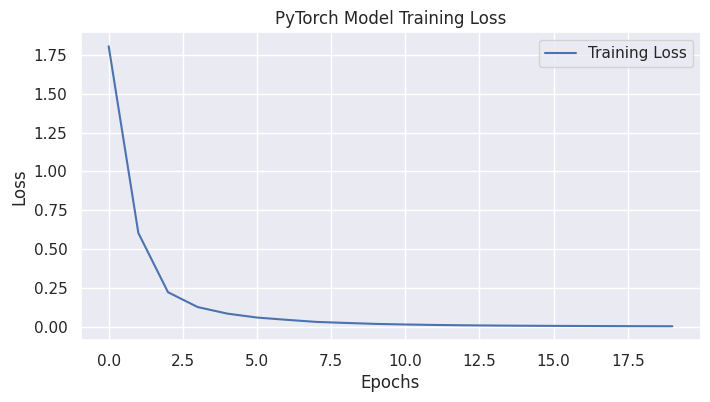

In [20]:
# Convert numpy arrays to PyTorch tensors
X_train_torch = torch.tensor(X_train_tf, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_tf, dtype=torch.long)
X_test_torch = torch.tensor(X_test_tf, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_tf, dtype=torch.long)

# Create DataLoader objects
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Define MLP architecture
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


# Initialize model, loss function, and optimizer
model_pt = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pt.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model_pt.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_pt(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate on test data
model_pt.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_pt(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

test_accuracy = correct / total
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Training Loss')
plt.title('PyTorch Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5: Experiment with different activation functions (TensorFlow)


Training MLP with activation: relu

Activation: relu | Test Accuracy: 0.9861

Training MLP with activation: sigmoid

Activation: sigmoid | Test Accuracy: 0.9667

Training MLP with activation: tanh

Activation: tanh | Test Accuracy: 0.9833


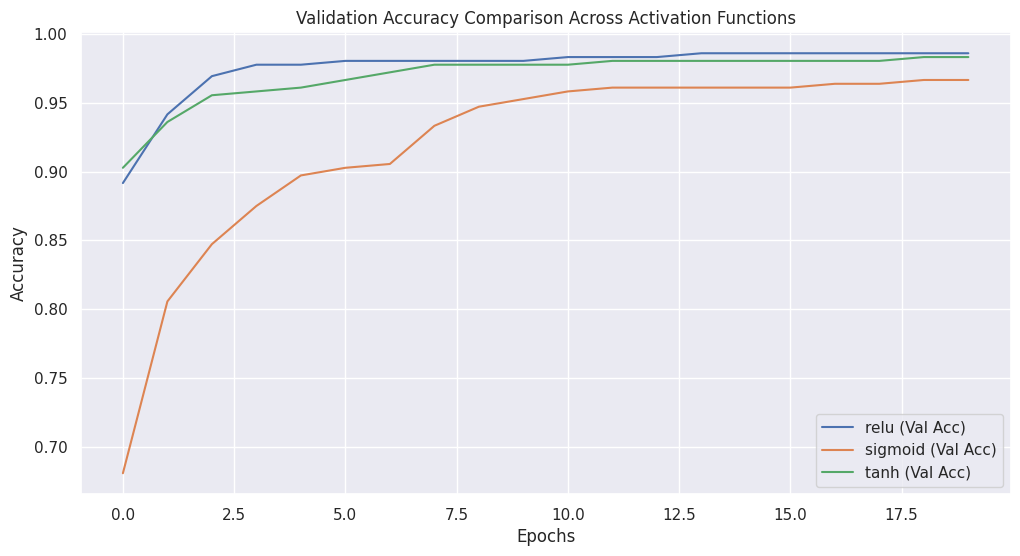

In [21]:
# Define a function to build and train models with different activations
def build_and_train_model(activation_fn, X_train, y_train, X_test, y_test, epochs=20):
    print(f"\nTraining MLP with activation: {activation_fn}\n")

    model = keras.Sequential([
        layers.Input(shape=(64,)),
        layers.Dense(128, activation=activation_fn),
        layers.Dense(64, activation=activation_fn),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_fn} | Test Accuracy: {test_acc:.4f}")

    return history, test_acc


# Run experiments for ReLU, Sigmoid, and Tanh
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for act in activations:
    history, acc = build_and_train_model(act, X_train_tf, y_train_tf, X_test_tf, y_test_tf)
    results[act] = {
        'history': history,
        'accuracy': acc
    }

# Compare performance visually
plt.figure(figsize=(12, 6))
for act in activations:
    plt.plot(results[act]['history'].history['val_accuracy'], label=f'{act} (Val Acc)')

plt.title('Validation Accuracy Comparison Across Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

| Activation Function | Test Accuracy | Observations                                                                                                                           |
| ------------------- | ------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **ReLU**            | **0.9861**    | Best performer — converged quickly and achieved the highest accuracy. It handled nonlinearity efficiently without vanishing gradients. |
| **Sigmoid**         | 0.9667        | Lower accuracy — due to **vanishing gradient issues**, especially in deeper layers. Training likely converged slower.                  |
| **Tanh**            | 0.9833        | Close to ReLU but slightly worse — still performs better than sigmoid since it’s zero-centered, but gradients are smaller than ReLU.   |


 ✅ ReLU is the most effective activation function for this image classification task — it yields the best accuracy and stability.

⚠️ Sigmoid should generally be avoided for hidden layers in deep networks (better suited for binary classification outputs).

⚖️ Tanh can be a decent alternative when ReLU causes issues like “dying neurons,” but typically performs slightly worse.